<a href="https://colab.research.google.com/github/Matthieu-PERRIN-dev/Deep_learning_with_python/blob/main/Fashion_MNIST_exercice_perso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist

In [48]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [49]:
print(train_data.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [51]:
train_data = train_data.reshape((60000, 28*28))
test_data = test_data.reshape((10000, 28*28))

In [52]:
normalized_train_data = train_data.astype("float32")/255
normalized_test_data = test_data.astype("float32")/255

In [53]:
partial_x_train = normalized_train_data[0:30000]
partial_y_train = train_labels[0:30000]
x_val = normalized_train_data[30000:]
y_val = train_labels[30000:]

In [72]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [73]:
history = model.fit(partial_x_train, partial_y_train, batch_size=128, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6884 - loss: 0.8542 - val_accuracy: 0.8045 - val_loss: 0.5568
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8376 - loss: 0.4464 - val_accuracy: 0.8075 - val_loss: 0.5481
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8596 - loss: 0.3854 - val_accuracy: 0.8317 - val_loss: 0.4737
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8680 - loss: 0.3449 - val_accuracy: 0.8633 - val_loss: 0.3901
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8817 - loss: 0.3135 - val_accuracy: 0.8733 - val_loss: 0.3601


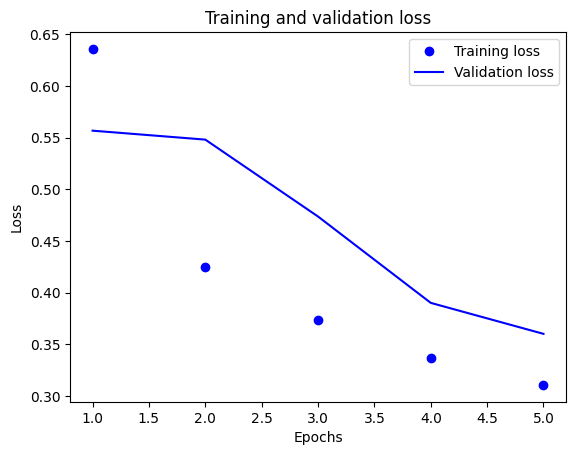

In [74]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

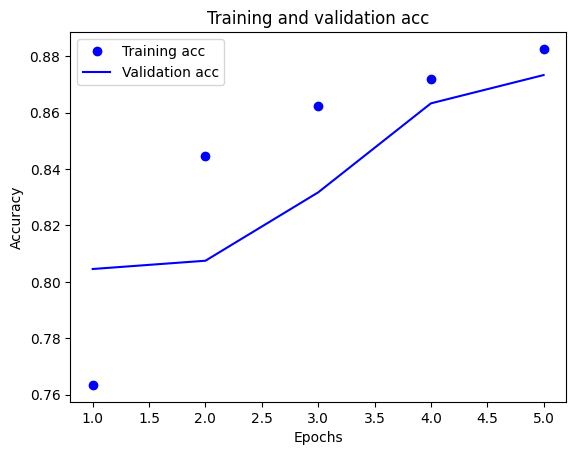

In [75]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [76]:
model.evaluate(normalized_test_data, test_labels, batch_size=128)

79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8615 - loss: 0.3868


[0.3919450342655182, 0.8611000180244446]

In [77]:
predictions = model.predict(normalized_test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [84]:
print(np.asarray([np.argmax(predictions[i]) for i in range (30)]))
print(test_labels[:30])

[9 2 1 1 0 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0 2 7 7 5 1 2 4 0 9 4]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]
